## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [289]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [291]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [292]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
906.0         1
225.0         1
862.0         1
2570.0        1
1816.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [293]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [294]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [295]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [296]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [297]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [298]:
# Update null values to 0
df.fillna(0, inplace = True)

In [299]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [300]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- waterfront: convert to binary {0: no waterfront, 1: has waterfront}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)

In [301]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [302]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [303]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [304]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [305]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [306]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [307]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [308]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [310]:
# waterfront
df['waterfront'].value_counts()

0.0    21001
1.0      142
Name: waterfront, dtype: int64

In [311]:
# Update waterfront
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x > 0 else 0)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [313]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [314]:
# cols to round
#cols = ['bedrooms', 'bathrooms']

#df[cols] = df[cols].round(0)
#df[cols]

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  int64  
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


In [316]:
df['bathrooms'] = df.bathrooms.astype(int)
df['waterfront'] = df.waterfront.astype(int)

## Check for outliers

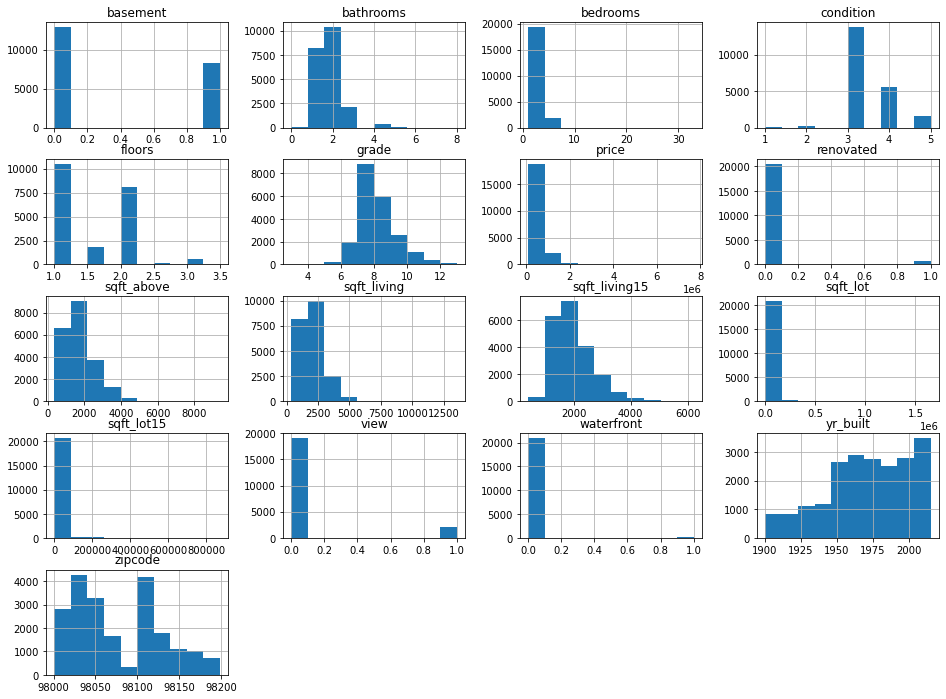

In [317]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

In [318]:
# bathrooms
#df['bathrooms'].hist();

In [319]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

In [320]:
#df['bathrooms'].value_counts()

In [321]:
# Set limit to 4
#df = df[df['bathrooms']<=4]

In [322]:
# bathrooms
#df['bathrooms'].hist();

In [323]:
# bedrooms
#df['bedrooms'].hist();

In [324]:
#df['bedrooms'].value_counts()

In [325]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

In [326]:
# Set limit to 12
#df = df[df['bedrooms']<=5]

In [327]:
#df['bedrooms'].hist()

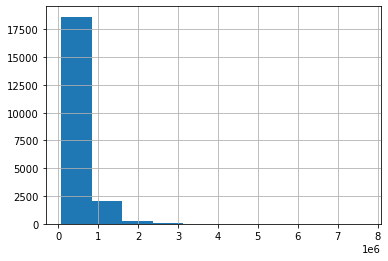

In [328]:
#price
df.price.hist();

In [329]:
df.price.value_counts()

350000.0    168
450000.0    167
550000.0    155
500000.0    149
425000.0    146
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3581, dtype: int64

In [330]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 888998.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [331]:
# Set limit to 1100000
df = df[df['price']<=1600000]

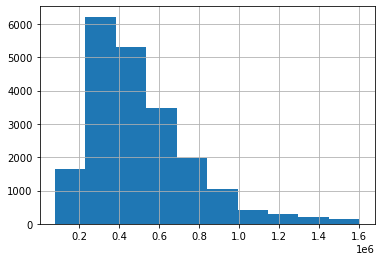

In [332]:
df.price.hist();

In [333]:
# features
sqft_feats = ['bathrooms', 'bedrooms','floors', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

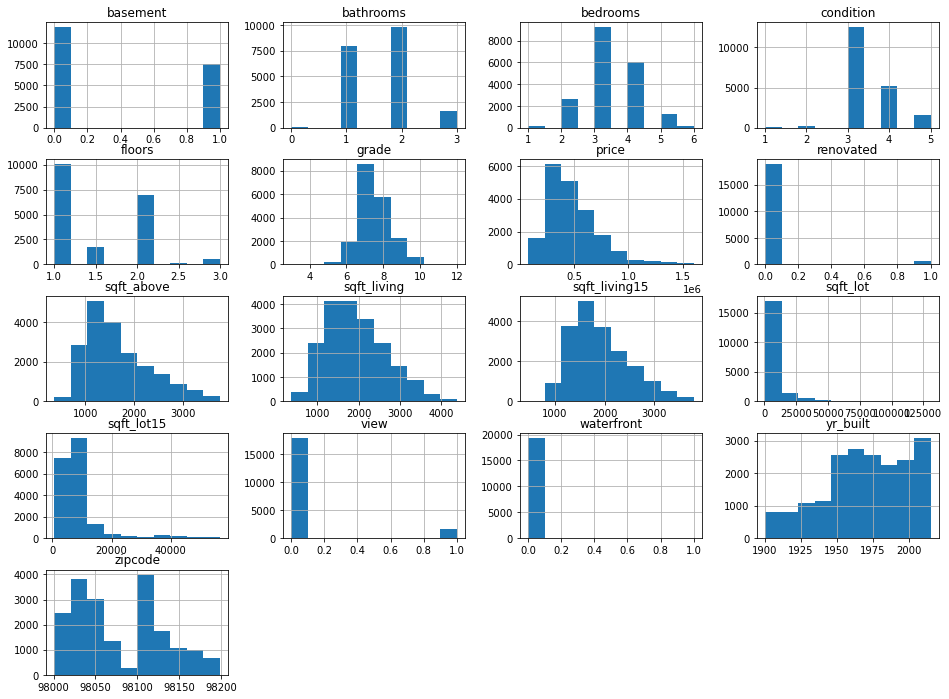

In [334]:
df.hist(figsize=(16,12));

In [335]:
df.floors.value_counts()

1.0    10032
2.0     6982
1.5     1744
3.0      558
2.5      111
Name: floors, dtype: int64

In [336]:
df.bedrooms.value_counts()

3    9203
4    5998
2    2614
5    1245
6     184
1     183
Name: bedrooms, dtype: int64

In [337]:
df.bathrooms.value_counts()

2    9762
1    7997
3    1598
0      70
Name: bathrooms, dtype: int64

## Normalize Continuous Features

In [338]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = bathrooms (decided to not include bathrooms, bedrooms, floors)
log_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']
for var in log_feats:
    df[var]= np.log(df[var])

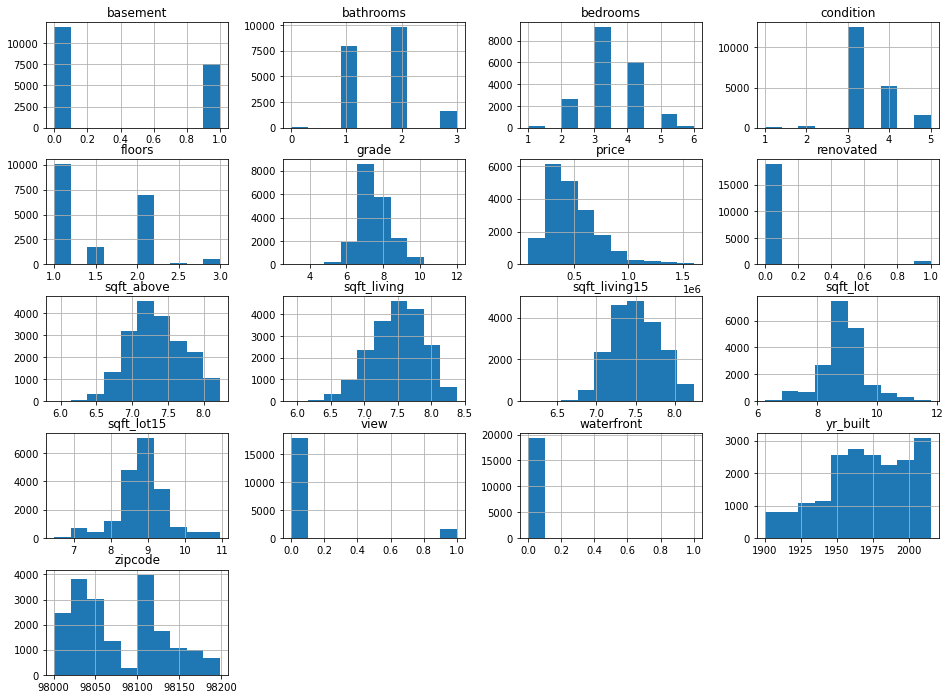

In [339]:
df.hist(figsize = (16,12));

In [340]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data more normal, it will just change the mean and the standard error!

continuous_feats = ['bathrooms', 'bedrooms', 'floors','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

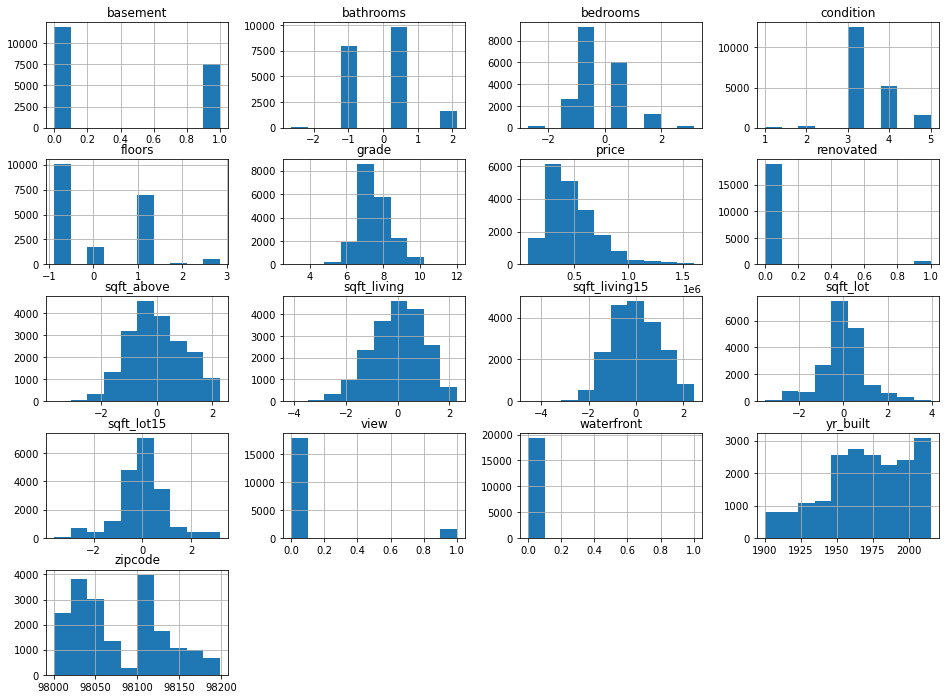

In [341]:
df.hist(figsize = (16, 12));

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19427 non-null  float64
 1   bedrooms       19427 non-null  float64
 2   bathrooms      19427 non-null  float64
 3   sqft_living    19427 non-null  float64
 4   sqft_lot       19427 non-null  float64
 5   floors         19427 non-null  float64
 6   waterfront     19427 non-null  int64  
 7   view           19427 non-null  int64  
 8   condition      19427 non-null  int64  
 9   grade          19427 non-null  int64  
 10  sqft_above     19427 non-null  float64
 11  yr_built       19427 non-null  int64  
 12  zipcode        19427 non-null  int64  
 13  sqft_living15  19427 non-null  float64
 14  sqft_lot15     19427 non-null  float64
 15  renovated      19427 non-null  int64  
 16  basement       19427 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 2.7 MB


# Explore Data

## What are my top zip codes

In [343]:
df.zipcode.value_counts()

98103    574
98115    558
98117    537
98052    537
98034    514
        ... 
98010     75
98070     66
98148     54
98024     40
98039     16
Name: zipcode, Length: 70, dtype: int64

In [344]:
# Create copy
dfziptiers = df.copy()

In [345]:
# Groupby zipcode and take median price
dfzipmed = dfziptiers.groupby(dfziptiers['zipcode'])['price'].median().sort_values(ascending = False)

# Reset index after groupy
dfzipmed = dfzipmed.reset_index()

# Set as string to match
dfzipmed['zipcode'] = dfzipmed['zipcode'].astype('object')

dfzipmed.head(10)

,zipcode,price
0,98039,1245000.0
1,98004,921000.0
2,98040,905000.0
3,98112,803975.0
4,98005,738950.0
5,98119,713000.0
6,98109,710200.0
7,98075,700000.0
8,98006,693000.0
9,98102,675000.0


In [346]:
# Count number of houses in each zipcode

# Get list of unique zipcodes
zipcodelist = list(dfzipmed['zipcode'].unique())

# Create empty dictionary
zipcodecount = {}

# iterate through unique zipcodes and add count to dictionary
for zipcode in zipcodelist:
    count = len(dfziptiers[dfziptiers['zipcode'] == zipcode])
    zipcodecount[zipcode] = count
    
# create DataFrame based on count
dfzipcount = pd.DataFrame.from_dict(zipcodecount, orient='index')
dfzipcount = dfzipcount.reset_index()
dfzipcount = dfzipcount.rename(columns = {'index': 'zipcode', 0 :'count'})
dfzipcount.head()

,zipcode,count
0,98039,16
1,98004,214
2,98040,206
3,98112,210
4,98005,147


In [347]:
# Merge the two tables
df_zip_price_count = dfzipmed.merge(dfzipcount, how = 'inner')
df_zip_price_count

,zipcode,price,count
0,98039,1245000.0,16
1,98004,921000.0,214
2,98040,905000.0,206
3,98112,803975.0,210
4,98005,738950.0,147
...,...,...,...
65,98188,262000.0,127
66,98001,260000.0,345
67,98032,249000.0,122
68,98168,235000.0,260


In [348]:
# https://stackoverflow.com/questions/60255203/how-to-label-every-nth-row-of-a-pandas-dataframe-by-an-incremental-value
df_zip_price_count['rank'] = np.divmod(np.arange(len(df_zip_price_count)),7)[0]+1

In [349]:
df_zip_price_count.head(15)

,zipcode,price,count,rank
0,98039,1245000.0,16,1
1,98004,921000.0,214,1
2,98040,905000.0,206,1
3,98112,803975.0,210,1
4,98005,738950.0,147,1
5,98119,713000.0,162,1
6,98109,710200.0,97,1
7,98075,700000.0,277,2
8,98006,693000.0,395,2
9,98102,675000.0,93,2


In [350]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,3,7,-0.698729,1955,98178,-1.008745,-0.324876,0,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,3,7,0.873264,1951,98125,-0.237968,0.132538,1,1
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,3,6,-1.800235,1933,98028,1.342729,0.214273,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,5,7,-0.999921,1965,98136,-0.959537,-0.510228,0,1
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,3,8,0.212862,1987,98074,-0.028523,0.105294,0,0


In [351]:
df_zip_price_count.drop(['price', 'count'], axis = 1, inplace = True)

In [352]:
df = pd.merge(df, df_zip_price_count, on='zipcode')

In [353]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement,rank
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,3,7,-0.698729,1955,98178,-1.008745,-0.324876,0,0,9
1,205425.0,-1.540474,-1.055505,-1.869729,-0.066084,-0.875711,0,0,4,6,-1.455675,1945,98178,-1.403057,-0.048373,0,0,9
2,445000.0,-0.366276,0.535533,0.389642,0.191057,-0.875711,0,1,3,8,0.119020,1967,98178,1.268641,0.331868,0,1,9
3,236000.0,-0.366276,-1.055505,-0.856127,-0.254420,-0.875711,0,0,3,7,-0.448821,1961,98178,-1.058692,0.128562,0,0,9
4,170000.0,-1.540474,-1.055505,-1.929448,-0.407846,-0.875711,0,0,3,6,-1.514996,1931,98178,-0.317528,0.342795,0,0,9


In [354]:
df_rankzip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 19426
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19427 non-null  float64
 1   bedrooms       19427 non-null  float64
 2   bathrooms      19427 non-null  float64
 3   sqft_living    19427 non-null  float64
 4   sqft_lot       19427 non-null  float64
 5   floors         19427 non-null  float64
 6   waterfront     19427 non-null  int64  
 7   view           19427 non-null  int64  
 8   condition      19427 non-null  int64  
 9   grade          19427 non-null  int64  
 10  sqft_above     19427 non-null  float64
 11  yr_built       19427 non-null  int64  
 12  zipcode        19427 non-null  object 
 13  sqft_living15  19427 non-null  float64
 14  sqft_lot15     19427 non-null  float64
 15  renovated      19427 non-null  int64  
 16  basement       19427 non-null  int64  
 17  rank           19427 non-null  int64  
dtypes: flo

## Check for linearity

In [355]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Error in callback <function flush_figures at 0x7fdc42848b80> (for post_execute):


/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


KeyboardInterrupt: 

Note: sqft_living has the best linear relationship with price

# Box Plots

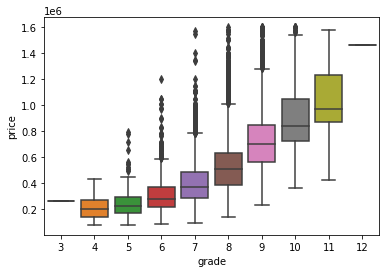

In [356]:
sns.boxplot(x = df['grade'], y = df['price'])

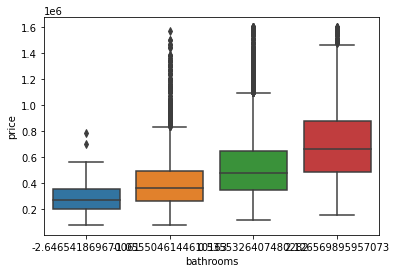

In [357]:
sns.boxplot(x = df['bathrooms'], y = df['price'])

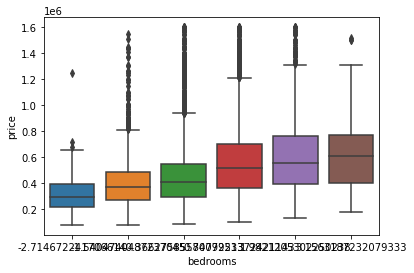

In [358]:
sns.boxplot(x = df['bedrooms'], y = df['price'])

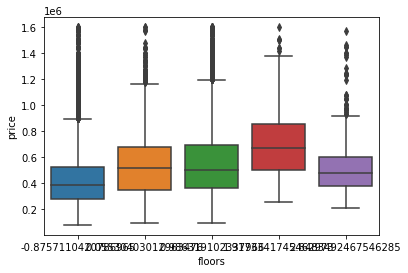

In [359]:
sns.boxplot(x = df['floors'], y = df['price'])

No relationship with price

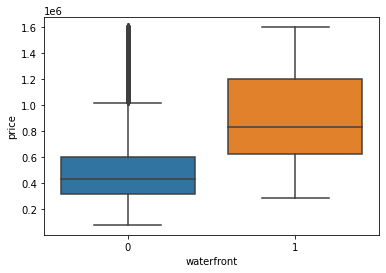

In [360]:
sns.boxplot(x = df['waterfront'], y = df['price'])

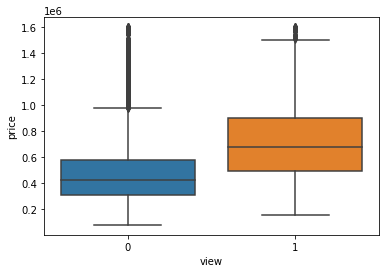

In [361]:
sns.boxplot(x = df['view'], y = df['price'])

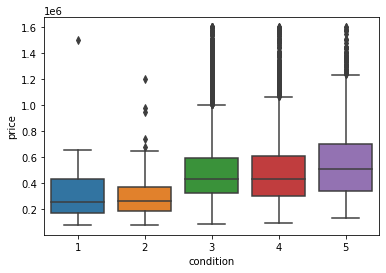

In [362]:
sns.boxplot(x = df['condition'], y = df['price'])

## Check for multicollinearity

In [363]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,1.000000,0.285262,0.384606,0.574308,0.056632,0.245163,0.101507,0.293801,0.069338,0.618272,0.477246,0.002274,0.521103,0.049323,0.106959,0.203859,-0.680220
bedrooms,0.285262,1.000000,0.421296,0.633601,0.216917,0.150759,-0.029398,0.047124,0.036062,0.331484,0.511614,0.159728,0.402014,0.197016,0.001454,0.156934,-0.040492
bathrooms,0.384606,0.421296,1.000000,0.610781,-0.041031,0.479138,-0.005466,0.085310,-0.127381,0.529724,0.563744,0.461439,0.437238,-0.041909,0.040608,0.116076,-0.135897
sqft_living,0.574308,0.633601,0.610781,1.000000,0.270025,0.332451,0.012403,0.174816,-0.033872,0.686079,0.834579,0.337187,0.714724,0.250079,0.033666,0.246836,-0.184195
sqft_lot,0.056632,0.216917,-0.041031,0.270025,1.000000,-0.351419,0.058732,0.075511,0.119150,0.077591,0.246957,-0.080052,0.332476,0.909966,0.013745,-0.043190,0.144126
floors,0.245163,0.150759,0.479138,0.332451,-0.351419,1.000000,-0.000217,-0.021464,-0.267322,0.451490,0.537031,0.497274,0.242488,-0.337343,-0.002810,-0.274838,-0.146648
waterfront,0.101507,-0.029398,-0.005466,0.012403,0.058732,-0.000217,1.000000,0.193305,0.005121,0.007636,0.000335,-0.033008,0.032289,0.069180,0.067045,0.017463,0.021631
view,0.293801,0.047124,0.085310,0.174816,0.075511,-0.021464,0.193305,1.000000,0.044514,0.160235,0.075261,-0.087682,0.212609,0.072919,0.067537,0.179069,-0.061243
condition,0.069338,0.036062,-0.127381,-0.033872,0.119150,-0.267322,0.005121,0.044514,1.000000,-0.149152,-0.144121,-0.353514,-0.083396,0.124530,-0.056623,0.130997,-0.034105
grade,0.618272,0.331484,0.529724,0.686079,0.077591,0.451490,0.007636,0.160235,-0.149152,1.000000,0.688606,0.459912,0.636273,0.091115,0.003602,0.040287,-0.321006


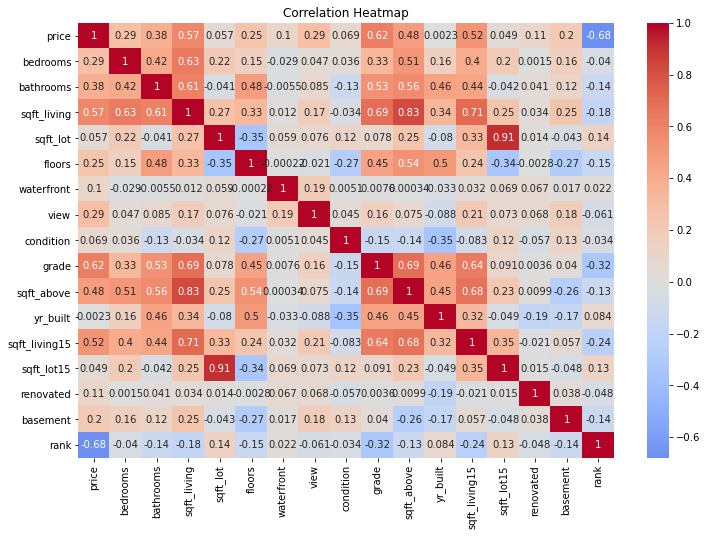

In [364]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [365]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,1.000000,0.285262,0.384606,0.574308,0.056632,0.245163,0.101507,0.293801,0.069338,0.618272,0.477246,0.002274,0.521103,0.049323,0.106959,0.203859,-0.680220
bedrooms,0.285262,1.000000,0.421296,0.633601,0.216917,0.150759,-0.029398,0.047124,0.036062,0.331484,0.511614,0.159728,0.402014,0.197016,0.001454,0.156934,-0.040492
bathrooms,0.384606,0.421296,1.000000,0.610781,-0.041031,0.479138,-0.005466,0.085310,-0.127381,0.529724,0.563744,0.461439,0.437238,-0.041909,0.040608,0.116076,-0.135897
sqft_living,0.574308,0.633601,0.610781,1.000000,0.270025,0.332451,0.012403,0.174816,-0.033872,0.686079,0.834579,0.337187,0.714724,0.250079,0.033666,0.246836,-0.184195
sqft_lot,0.056632,0.216917,-0.041031,0.270025,1.000000,-0.351419,0.058732,0.075511,0.119150,0.077591,0.246957,-0.080052,0.332476,0.909966,0.013745,-0.043190,0.144126
floors,0.245163,0.150759,0.479138,0.332451,-0.351419,1.000000,-0.000217,-0.021464,-0.267322,0.451490,0.537031,0.497274,0.242488,-0.337343,-0.002810,-0.274838,-0.146648
waterfront,0.101507,-0.029398,-0.005466,0.012403,0.058732,-0.000217,1.000000,0.193305,0.005121,0.007636,0.000335,-0.033008,0.032289,0.069180,0.067045,0.017463,0.021631
view,0.293801,0.047124,0.085310,0.174816,0.075511,-0.021464,0.193305,1.000000,0.044514,0.160235,0.075261,-0.087682,0.212609,0.072919,0.067537,0.179069,-0.061243
condition,0.069338,0.036062,-0.127381,-0.033872,0.119150,-0.267322,0.005121,0.044514,1.000000,-0.149152,-0.144121,-0.353514,-0.083396,0.124530,-0.056623,0.130997,-0.034105
grade,0.618272,0.331484,0.529724,0.686079,0.077591,0.451490,0.007636,0.160235,-0.149152,1.000000,0.688606,0.459912,0.636273,0.091115,0.003602,0.040287,-0.321006


In [366]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [367]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,renovated,basement,rank
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [368]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.909966
"(sqft_above, sqft_living)",0.834579


In [369]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [370]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'renovated', 'basement', 'rank'],
      dtype='object')

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 19426
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19427 non-null  float64
 1   bedrooms     19427 non-null  float64
 2   bathrooms    19427 non-null  float64
 3   sqft_living  19427 non-null  float64
 4   sqft_lot     19427 non-null  float64
 5   floors       19427 non-null  float64
 6   waterfront   19427 non-null  int64  
 7   view         19427 non-null  int64  
 8   condition    19427 non-null  int64  
 9   grade        19427 non-null  int64  
 10  yr_built     19427 non-null  int64  
 11  zipcode      19427 non-null  object 
 12  renovated    19427 non-null  int64  
 13  basement     19427 non-null  int64  
 14  rank         19427 non-null  int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 3.0+ MB


## Save Results

In [372]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [373]:
categorical_feats = ['basement', 'condition', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [374]:
df = pd.get_dummies(df, drop_first = True)

In [375]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,205425.0,-1.540474,-1.055505,-1.869729,-0.066084,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,445000.0,-0.366276,0.535533,0.389642,0.191057,-0.875711,9,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,236000.0,-0.366276,-1.055505,-0.856127,-0.254420,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,170000.0,-1.540474,-1.055505,-1.929448,-0.407846,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [376]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [377]:
df.columns = [col_formatting(col) for col in df.columns]

In [378]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'rank',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built

In [379]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [380]:
train, test = train_test_split(df)

In [381]:
print(len(train), len(test))
train.head()

14570 4857


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
3563,372500.0,-1.540474,0.535533,-0.663620,-1.187015,0.986319,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12340,625000.0,0.807922,2.126570,0.498650,0.795319,-0.875711,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7339,395000.0,-0.366276,-1.055505,-0.484400,-0.779191,-0.875711,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13893,279950.0,-0.366276,-1.055505,-0.128886,0.428324,-0.875711,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11586,1220000.0,-0.366276,2.126570,1.342010,-0.324485,0.986319,5,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [382]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15367,305000.0,-1.540474,-1.055505,-1.197294,-1.177002,0.986319,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14274,335000.0,-0.366276,-1.055505,-1.243272,0.327909,-0.875711,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10822,400000.0,-0.366276,0.535533,0.414264,-0.869294,0.986319,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16327,585000.0,0.807922,0.535533,0.659619,2.517259,0.986319,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,750000.0,0.807922,-1.055505,0.197134,-0.165314,0.055304,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [383]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     343.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:15   Log-Likelihood:            -1.8812e+05
No. Observations:               14570   AIC:                         3.766e+05
Df Residuals:                   14364   BIC:                         3.782e+05
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.793e+05    2.4e+04     36.610      0.000    8.32e+05    9.26e+05
bedrooms      -2781.1729   1135.701     -2.449      0.014   -5007.293    -555.053
bathrooms      1.193e+04   1212.257      9.838      0.000    9550.151    1.43e+04
sqft_living    7.867e+04   1727.000     45.553      0.000    7.53e+04    8.21e+04
sqft_lot       2.692e+04   1404.249     19.171      0.000    2.42e+04    2.97e+04
floors        -4837.0622   1417.151     -3.413      0.001   -7614.862   -2059.263
rank          -4.221e+04   1043.546    -40.447      0.000   -4.43e+04   -4.02e+04
waterfront_1   3.458e+05   1.46e+04     23.624      0.000    3.17e+05    3.74e+05
view_1         1.039e+05   3368.248     30.835      0.000    9.73e+04     1.1e+05
condition_2    5.758e+04   2.29e+04      2.509      0.012    1.26e+04    1.03e+05
condition_3    7.312e+04   2.11e+04      3.470      0.001    3.18e+04    1.14e+05
condition_4    9.293e+04   2.11e+04      4.406      0.000    5.16e+04    1.34e+05
condition_5    1.281e+05   2.12e+04      6.027      0.000    8.64e+04     1.7e+05
grade_11        1.24e+05   1.37e+04      9.067      0.000    9.72e+04    1.51e+05
grade_12       8.273e-11   1.65e-10      0.501      0.617   -2.41e-10    4.07e-10
grade_3       -6.097e+04      1e+05     -0.609      0.543   -2.57e+05    1.35e+05
grade_4       -2.252e+05   2.27e+04     -9.926      0.000    -2.7e+05   -1.81e+05
grade_5       -2.691e+05   1.04e+04    -25.993      0.000   -2.89e+05   -2.49e+05
grade_6       -2.705e+05   6741.081    -40.127      0.000   -2.84e+05   -2.57e+05
grade_7       -2.535e+05   5532.366    -45.818      0.000   -2.64e+05   -2.43e+05
grade_8       -2.078e+05   5053.958    -41.123      0.000   -2.18e+05   -1.98e+05
grade_9       -1.041e+05   5131.726    -20.293      0.000   -1.14e+05   -9.41e+04
yr_built_1901 -7.778e+04   2.71e+04     -2.875      0.004   -1.31e+05   -2.48e+04
yr_built_1902  5842.7032   2.65e+04      0.221      0.825   -4.61e+04    5.78e+04
yr_built_1903 -1.453e+04   2.15e+04     -0.676      0.499   -5.67e+04    2.76e+04
yr_built_1904 -9072.0703   2.11e+04     -0.430      0.667   -5.05e+04    3.23e+04
yr_built_1905  1.381e+04    1.9e+04      0.728      0.467   -2.34e+04     5.1e+04
yr_built_1906  2477.4927   1.72e+04      0.144      0.886   -3.13e+04    3.63e+04
yr_built_1907  4663.1209   1.96e+04      0.238      0.812   -3.38e+04    4.31e+04
yr_built_1908 -3.195e+04   1.76e+04     -1.817      0.069   -6.64e+04    2525.697
yr_built_1909 -2.149e+04   1.77e+04     -1.213      0.225   -5.62e+04    1.32e+04
yr_built_1910  -1.02e+04   1.62e+04     -0.628      0.530    -4.2e+04    2.16e+04
yr_built_1911  4127.7436   1.88e+04      0.219      0.827   -3.28e+04    4.11e+04
yr_built_1912 -4.591e+04   1.85e+04     -2.488      0.013   -8.21e+04   -9734.003
yr_built_1913  3.049e+04   2.04e+04      1.495   

## Remove the Uninfluential Features

In [384]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

208 144
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,8.793e+05,2.4e+04,36.610,0.000,8.32e+05,9.26e+05
bedrooms,-2781.1729,1135.701,-2.449,0.014,-5007.293,-555.053
bathrooms,1.193e+04,1212.257,9.838,0.000,9550.151,1.43e+04
sqft_living,7.867e+04,1727.000,45.553,0.000,7.53e+04,8.21e+04
sqft_lot,2.692e+04,1404.249,19.171,0.000,2.42e+04,2.97e+04


In [385]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     486.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:15   Log-Likelihood:            -1.8817e+05
No. Observations:               14570   AIC:                         3.766e+05
Df Residuals:                   14425   BIC:                         3.777e+05
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.668e+05   2.32e+04     37.418      0.000    8.21e+05    9.12e+05
bedrooms      -2441.0639   1129.941     -2.160      0.031   -4655.893    -226.235
bathrooms      1.155e+04   1182.965      9.762      0.000    9229.875    1.39e+04
sqft_living    7.924e+04   1712.104     46.280      0.000    7.59e+04    8.26e+04
sqft_lot       2.683e+04   1302.115     20.602      0.000    2.43e+04    2.94e+04
floors        -5940.2837   1359.113     -4.371      0.000   -8604.320   -3276.247
rank          -4.113e+04   1027.807    -40.013      0.000   -4.31e+04   -3.91e+04
waterfront_1    3.48e+05   1.46e+04     23.806      0.000    3.19e+05    3.77e+05
view_1         1.044e+05   3333.915     31.329      0.000    9.79e+04    1.11e+05
condition_2    5.445e+04   2.28e+04      2.385      0.017    9693.042    9.92e+04
condition_3    6.893e+04    2.1e+04      3.289      0.001    2.78e+04     1.1e+05
condition_4    8.968e+04    2.1e+04      4.276      0.000    4.86e+04    1.31e+05
condition_5    1.255e+05   2.11e+04      5.939      0.000    8.41e+04    1.67e+05
grade_11       1.232e+05   1.37e+04      9.003      0.000    9.64e+04     1.5e+05
grade_4       -2.227e+05   2.25e+04     -9.917      0.000   -2.67e+05   -1.79e+05
grade_5        -2.66e+05   1.01e+04    -26.379      0.000   -2.86e+05   -2.46e+05
grade_6       -2.688e+05   6543.308    -41.086      0.000   -2.82e+05   -2.56e+05
grade_7       -2.531e+05   5446.963    -46.458      0.000   -2.64e+05   -2.42e+05
grade_8       -2.077e+05   5029.620    -41.297      0.000   -2.18e+05   -1.98e+05
grade_9       -1.034e+05   5123.852    -20.171      0.000   -1.13e+05   -9.33e+04
yr_built_1901 -7.208e+04   2.42e+04     -2.978      0.003    -1.2e+05   -2.46e+04
yr_built_1912 -4.007e+04   1.36e+04     -2.940      0.003   -6.68e+04   -1.34e+04
yr_built_1918 -3.184e+04   1.08e+04     -2.946      0.003    -5.3e+04   -1.07e+04
yr_built_1936 -4.232e+04   2.04e+04     -2.078      0.038   -8.22e+04   -2409.737
yr_built_1942 -2.708e+04   8571.687     -3.159      0.002   -4.39e+04   -1.03e+04
yr_built_1943  -2.58e+04   9304.238     -2.773      0.006    -4.4e+04   -7561.265
yr_built_1946 -2.947e+04   1.11e+04     -2.646      0.008   -5.13e+04   -7636.858
yr_built_1947  -2.43e+04   7722.249     -3.147      0.002   -3.94e+04   -9163.235
yr_built_1948 -2.319e+04   7845.799     -2.956      0.003   -3.86e+04   -7812.923
yr_built_1950 -2.487e+04   7773.316     -3.199      0.001   -4.01e+04   -9632.583
yr_built_1951  -3.47e+04   8038.187     -4.317      0.000   -5.05e+04   -1.89e+04
yr_built_1952 -2.509e+04   8268.077     -3.035      0.002   -4.13e+04   -8887.427
yr_built_1953 -3.363e+04   8233.522     -4.084      0.000   -4.98e+04   -1.75e+04
yr_built_1954  -3.61e+04   7144.161     -5.054      0.000   -5.01e+04   -2.21e+04
yr_built_1955 -4.212e+04   7411.603     -5.683   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [386]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.9032708267647296),
 ('bathrooms', 2.074095217437429),
 ('sqft_living', 4.349886828479684),
 ('sqft_lot', 2.5392066067235133),
 ('floors', 2.7671623691158005),
 ('rank', 53.370365191455356),
 ('waterfront_1', 1.0996396848829484),
 ('view_1', 1.317420322840798),
 ('condition_2', 1.9418399014105088),
 ('condition_3', 77.66983735920226),
 ('condition_4', 34.011770651657926),
 ('condition_5', 10.817111060848552),
 ('grade_11', 1.1257534891546135),
 ('grade_4', 1.1119615209567675),
 ('grade_5', 1.684829550507516),
 ('grade_6', 6.175386220107812),
 ('grade_7', 18.817167061753487),
 ('grade_8', 10.81479789376954),
 ('grade_9', 4.384055193757175),
 ('yr_built_1901', 1.0195612197168458),
 ('yr_built_1912', 1.0253013198279426),
 ('yr_built_1918', 1.0395048192906047),
 ('yr_built_1936', 1.0169580417244641),
 ('yr_built_1942', 1.0991099120189483),
 ('yr_built_1943', 1.0789318708506475),
 ('yr_built_1946', 1.0411906169620773),
 ('yr_built_1947', 1.0962624143865296),
 ('yr_built_1948'

## Perform Another Round of Feature Selection

In [387]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

144 137


In [388]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     374.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:43   Log-Likelihood:            -1.9001e+05
No. Observations:               14570   AIC:                         3.803e+05
Df Residuals:                   14432   BIC:                         3.813e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.863e+05   3380.989    114.264      0.000     3.8e+05    3.93e+05
bedrooms      -1.016e+04   1265.920     -8.028      0.000   -1.26e+04   -7682.029
bathrooms      1.633e+04   1331.894     12.259      0.000    1.37e+04    1.89e+04
sqft_living    1.057e+05   1764.866     59.908      0.000    1.02e+05    1.09e+05
sqft_lot       2.925e+04   1458.168     20.058      0.000    2.64e+04    3.21e+04
floors        -1697.0199   1514.881     -1.120      0.263   -4666.382    1272.342
waterfront_1   3.427e+05   1.66e+04     20.692      0.000     3.1e+05    3.75e+05
view_1         1.237e+05   3752.024     32.963      0.000    1.16e+05    1.31e+05
condition_2   -2.161e+04   1.08e+04     -1.999      0.046   -4.28e+04    -423.770
grade_11       2.723e+05    1.5e+04     18.199      0.000    2.43e+05    3.02e+05
grade_4        7.059e+04   2.43e+04      2.899      0.004    2.29e+04    1.18e+05
grade_5        3557.2688   9076.542      0.392      0.695   -1.42e+04    2.13e+04
grade_9        8.234e+04   3295.816     24.984      0.000    7.59e+04    8.88e+04
yr_built_1901 -8.326e+04   2.74e+04     -3.036      0.002   -1.37e+05   -2.95e+04
yr_built_1912  -4.63e+04   1.54e+04     -2.998      0.003   -7.66e+04    -1.6e+04
yr_built_1918 -3.562e+04   1.22e+04     -2.912      0.004   -5.96e+04   -1.16e+04
yr_built_1936 -4.947e+04   2.31e+04     -2.144      0.032   -9.47e+04   -4234.769
yr_built_1942 -1.472e+04   9673.896     -1.522      0.128   -3.37e+04    4242.625
yr_built_1943 -2.784e+04   1.05e+04     -2.648      0.008   -4.85e+04   -7235.900
yr_built_1946     -3e+04   1.26e+04     -2.377      0.017   -5.47e+04   -5265.488
yr_built_1947 -2.446e+04   8748.726     -2.796      0.005   -4.16e+04   -7315.502
yr_built_1948 -2.097e+04   8890.668     -2.359      0.018   -3.84e+04   -3546.366
yr_built_1950 -2.251e+04   8808.730     -2.556      0.011   -3.98e+04   -5245.074
yr_built_1951 -2.629e+04   9107.404     -2.887      0.004   -4.41e+04   -8442.731
yr_built_1952  -2.18e+04   9357.078     -2.329      0.020   -4.01e+04   -3454.357
yr_built_1953 -2.482e+04   9317.327     -2.664      0.008   -4.31e+04   -6556.232
yr_built_1954 -3.413e+04   8083.649     -4.222      0.000      -5e+04   -1.83e+04
yr_built_1955 -3.981e+04   8368.661     -4.757      0.000   -5.62e+04   -2.34e+04
yr_built_1956 -2.786e+04   9738.108     -2.860      0.004   -4.69e+04   -8767.396
yr_built_1957 -4.828e+04   9741.551     -4.956      0.000   -6.74e+04   -2.92e+04
yr_built_1958 -4.858e+04   9358.702     -5.191      0.000   -6.69e+04   -3.02e+04
yr_built_1959 -4.933e+04   7818.812     -6.309      0.000   -6.47e+04    -3.4e+04
yr_built_1960  -4.15e+04   8803.544     -4.715      0.000   -5.88e+04   -2.42e+04
yr_built_1961 -4.804e+04   9445.150     -5.086      0.000   -6.65e+04   -2.95e+04
yr_built_1962 -5.056e+04   8162.868     -6.193   

Note: There are still p_values > 0.05

## Remove Uninfluential features

In [389]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

138 125
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront_1']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.863e+05,3380.989,114.264,0.0,3.8e+05,3.93e+05
bedrooms,-1.016e+04,1265.920,-8.028,0.0,-1.26e+04,-7682.029
bathrooms,1.633e+04,1331.894,12.259,0.0,1.37e+04,1.89e+04
sqft_living,1.057e+05,1764.866,59.908,0.0,1.02e+05,1.09e+05
sqft_lot,2.925e+04,1458.168,20.058,0.0,2.64e+04,3.21e+04


In [390]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     410.2
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:44   Log-Likelihood:            -1.9001e+05
No. Observations:               14570   AIC:                         3.803e+05
Df Residuals:                   14444   BIC:                         3.812e+05
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.832e+05   2959.254    129.508      0.000    3.77e+05    3.89e+05
bedrooms      -1.018e+04   1261.250     -8.072      0.000   -1.27e+04   -7709.080
bathrooms      1.594e+04   1301.567     12.246      0.000    1.34e+04    1.85e+04
sqft_living    1.053e+05   1650.359     63.813      0.000    1.02e+05    1.09e+05
sqft_lot       2.985e+04   1336.710     22.334      0.000    2.72e+04    3.25e+04
waterfront_1    3.43e+05   1.65e+04     20.738      0.000    3.11e+05    3.75e+05
view_1         1.237e+05   3743.899     33.035      0.000    1.16e+05    1.31e+05
condition_2   -2.099e+04   1.08e+04     -1.945      0.052   -4.21e+04     161.819
grade_11       2.725e+05    1.5e+04     18.218      0.000    2.43e+05    3.02e+05
grade_4        7.095e+04   2.43e+04      2.919      0.004    2.33e+04    1.19e+05
grade_9        8.237e+04   3288.715     25.048      0.000    7.59e+04    8.88e+04
yr_built_1901 -8.198e+04   2.74e+04     -2.989      0.003   -1.36e+05   -2.82e+04
yr_built_1912 -4.447e+04   1.54e+04     -2.882      0.004   -7.47e+04   -1.42e+04
yr_built_1918 -3.357e+04   1.22e+04     -2.749      0.006   -5.75e+04   -9633.534
yr_built_1936 -4.735e+04   2.31e+04     -2.054      0.040   -9.25e+04   -2159.444
yr_built_1943 -2.454e+04   1.04e+04     -2.351      0.019    -4.5e+04   -4082.289
yr_built_1946 -2.751e+04   1.26e+04     -2.186      0.029   -5.22e+04   -2844.431
yr_built_1947  -2.18e+04   8690.718     -2.509      0.012   -3.88e+04   -4766.724
yr_built_1948   -1.8e+04   8826.110     -2.040      0.041   -3.53e+04    -701.172
yr_built_1950 -1.966e+04   8740.790     -2.249      0.025   -3.68e+04   -2525.289
yr_built_1951 -2.335e+04   9034.716     -2.584      0.010   -4.11e+04   -5638.785
yr_built_1952 -1.872e+04   9264.276     -2.021      0.043   -3.69e+04    -564.066
yr_built_1953 -2.212e+04   9185.402     -2.408      0.016   -4.01e+04   -4113.308
yr_built_1954 -3.158e+04   7958.189     -3.969      0.000   -4.72e+04    -1.6e+04
yr_built_1955   -3.7e+04   8253.056     -4.483      0.000   -5.32e+04   -2.08e+04
yr_built_1956 -2.448e+04   9615.755     -2.546      0.011   -4.33e+04   -5635.905
yr_built_1957 -4.488e+04   9640.716     -4.655      0.000   -6.38e+04    -2.6e+04
yr_built_1958 -4.521e+04   9259.777     -4.882      0.000   -6.34e+04   -2.71e+04
yr_built_1959 -4.583e+04   7692.708     -5.957      0.000   -6.09e+04   -3.07e+04
yr_built_1960 -3.849e+04   8690.300     -4.429      0.000   -5.55e+04   -2.15e+04
yr_built_1961 -4.458e+04   9345.186     -4.771      0.000   -6.29e+04   -2.63e+04
yr_built_1962 -4.726e+04   8045.235     -5.874      0.000    -6.3e+04   -3.15e+04
yr_built_1963 -4.481e+04   8681.306     -5.161      0.000   -6.18e+04   -2.78e+04
yr_built_1964 -5.028e+04   1.03e+04     -4.898      0.000   -7.04e+04   -3.02e+04
yr_built_1965 -5.504e+04   9947.765     -5.533   

# Check the Normality Assumption

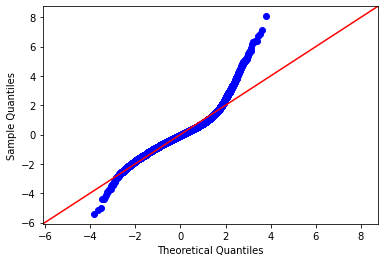

In [391]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.
Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

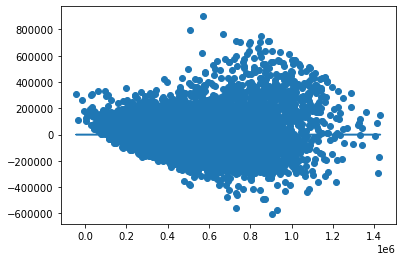

In [392]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [393]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([114593.91348522, 110560.6465458 , 112296.82700028, 113519.98051337,
       120485.2009438 , 110794.82498904, 113714.84703692, 111982.95846168,
       112956.93596703, 106166.64744345])

112707.27823865894

3428.2932871460825

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

In [394]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_1,view_1,condition_2,grade_11,grade_4,grade_9,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98168,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
3563,-1.540474,0.535533,-0.663620,-1.187015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12340,0.807922,2.126570,0.498650,0.795319,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7339,-0.366276,-1.055505,-0.484400,-0.779191,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13893,-0.366276,-1.055505,-0.128886,0.428324,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11586,-0.366276,2.126570,1.342010,-0.324485,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1


## Save model using pickle

# Model 2: Remove yr_built and zip code

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 19426
Columns: 208 entries, price to basement_1
dtypes: float64(6), int64(1), uint8(201)
memory usage: 5.5 MB


In [396]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,205425.0,-1.540474,-1.055505,-1.869729,-0.066084,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,445000.0,-0.366276,0.535533,0.389642,0.191057,-0.875711,9,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,236000.0,-0.366276,-1.055505,-0.856127,-0.254420,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,170000.0,-1.540474,-1.055505,-1.929448,-0.407846,-0.875711,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [397]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'rank',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built

In [398]:
model_2_df = df[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'renovated_1',
 'basement_1']]

In [399]:
model_2_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,205425.0,-1.540474,-1.055505,-1.869729,-0.066084,-0.875711,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,445000.0,-0.366276,0.535533,0.389642,0.191057,-0.875711,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
3,236000.0,-0.366276,-1.055505,-0.856127,-0.254420,-0.875711,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,170000.0,-1.540474,-1.055505,-1.929448,-0.407846,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [400]:
# Defining the problem
outcome = 'price'
x_cols = list(model_2_df.columns)
x_cols.remove(outcome)

In [401]:
#train, test = train_test_split(model_2_df)

In [402]:
print(len(train), len(test))
train.head()

14570 4857


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
3563,372500.0,-1.540474,0.535533,-0.663620,-1.187015,0.986319,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12340,625000.0,0.807922,2.126570,0.498650,0.795319,-0.875711,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7339,395000.0,-0.366276,-1.055505,-0.484400,-0.779191,-0.875711,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13893,279950.0,-0.366276,-1.055505,-0.128886,0.428324,-0.875711,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11586,1220000.0,-0.366276,2.126570,1.342010,-0.324485,0.986319,5,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [403]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15367,305000.0,-1.540474,-1.055505,-1.197294,-1.177002,0.986319,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14274,335000.0,-0.366276,-1.055505,-1.243272,0.327909,-0.875711,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10822,400000.0,-0.366276,0.535533,0.414264,-0.869294,0.986319,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16327,585000.0,0.807922,0.535533,0.659619,2.517259,0.986319,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,750000.0,0.807922,-1.055505,0.197134,-0.165314,0.055304,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [404]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     760.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:45   Log-Likelihood:            -1.9565e+05
No. Observations:               14570   AIC:                         3.914e+05
Df Residuals:                   14548   BIC:                         3.915e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.365e+05   3.55e+04     23.537      0.000    7.67e+05    9.06e+05
bedrooms     -5228.8153   1818.160     -2.876      0.004   -8792.640   -1664.990
bathrooms    -7052.0993   1903.423     -3.705      0.000   -1.08e+04   -3321.148
sqft_living     7.2e+04   2755.483     26.131      0.000    6.66e+04    7.74e+04
sqft_lot     -2.566e+04   1782.088    -14.399      0.000   -2.92e+04   -2.22e+04
floors        -686.3392   2079.655     -0.330      0.741   -4762.728    3390.049
waterfront_1  2.626e+05   2.37e+04     11.088      0.000    2.16e+05    3.09e+05
view_1        1.171e+05   5334.623     21.955      0.000    1.07e+05    1.28e+05
condition_2  -6.361e+04   3.78e+04     -1.684      0.092   -1.38e+05    1.04e+04
condition_3  -6.524e+04   3.46e+04     -1.883      0.060   -1.33e+05    2661.992
condition_4  -1.041e+04   3.47e+04     -0.300      0.764   -7.84e+04    5.75e+04
condition_5   5.066e+04   3.49e+04      1.451      0.147   -1.78e+04    1.19e+05
grade_11       1.66e+05   2.26e+04      7.337      0.000    1.22e+05     2.1e+05
grade_3      -4.048e+05   1.65e+05     -2.453      0.014   -7.28e+05   -8.14e+04
grade_4      -4.328e+05   3.69e+04    -11.737      0.000   -5.05e+05   -3.61e+05
grade_5      -4.641e+05   1.61e+04    -28.825      0.000   -4.96e+05   -4.33e+05
grade_6      -4.426e+05   1.02e+04    -43.305      0.000   -4.63e+05   -4.23e+05
grade_7      -4.057e+05   8599.581    -47.178      0.000   -4.23e+05   -3.89e+05
grade_8      -3.151e+05   8083.064    -38.985      0.000   -3.31e+05   -2.99e+05
grade_9      -1.506e+05   8373.461    -17.990      0.000   -1.67e+05   -1.34e+05
renovated_1   1.191e+05   7876.643     15.118      0.000    1.04e+05    1.35e+05
basement_1    3.991e+04   3450.585     11.565      0.000    3.31e+04    4.67e+04
==============================================================================
Omnibus:                     2483.913   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6385.297
Skew:                           0.942   Prob(JB):                         0.00
Kurtosis:                       5.640   Cond. No.                         190.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Perform stepwise selection

In [405]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 19426
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         19427 non-null  float64
 1   bedrooms      19427 non-null  float64
 2   bathrooms     19427 non-null  float64
 3   sqft_living   19427 non-null  float64
 4   sqft_lot      19427 non-null  float64
 5   floors        19427 non-null  float64
 6   waterfront_1  19427 non-null  uint8  
 7   view_1        19427 non-null  uint8  
 8   condition_2   19427 non-null  uint8  
 9   condition_3   19427 non-null  uint8  
 10  condition_4   19427 non-null  uint8  
 11  condition_5   19427 non-null  uint8  
 12  grade_11      19427 non-null  uint8  
 13  grade_3       19427 non-null  uint8  
 14  grade_4       19427 non-null  uint8  
 15  grade_5       19427 non-null  uint8  
 16  grade_6       19427 non-null  uint8  
 17  grade_7       19427 non-null  uint8  
 18  grade_8       19427 non-nu

In [406]:
'''
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
'''

'\ndef stepwise_selection(X, y, \n                       initial_list=[], \n                       threshold_in=0.01, \n                       threshold_out = 0.05, \n                       verbose=True):\n    """ Perform a forward`-backward feature selection \n    based on p-value from statsmodels.api.OLS\n    Arguments:\n        X - pandas.DataFrame with candidate features\n        y - list-like with the target\n        initial_list - list of features to start with (column names of X)\n        threshold_in - include a feature if its p-value < threshold_in\n        threshold_out - exclude a feature if its p-value > threshold_out\n        verbose - whether to print the sequence of inclusions and exclusions\n    Returns: list of selected features \n    Always set threshold_in < threshold_out to avoid infinite looping.\n    See https://en.wikipedia.org/wiki/Stepwise_regression for the details\n    """\n    included = list(initial_list)\n    while True:\n        changed=False\n        # f

In [407]:
'''
X = model_2_df.drop('price', axis=1)
y = model_2_df['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)
'''

"\nX = model_2_df.drop('price', axis=1)\ny = model_2_df['price']\n\nresult = stepwise_selection(X, y, verbose = True)\nprint('resulting features:')\nprint(result)\n"

In [408]:
'''
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()
'''

'\nX_fin = X[result]\nX_with_intercept = sm.add_constant(X_fin)\nmodel = sm.OLS(y,X_with_intercept).fit()\nmodel.summary()\n'

Note much of a difference in Adj. R-squared.

21 features, underfitting due to low Adj. R-squared.

# Model 3: Remove yr_built 

In [409]:
model_3_df = df[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98188',
 'zipcode_98198',
 'zipcode_98199',
 'renovated_1',
 'basement_1']]

In [410]:
model_3_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,205425.0,-1.540474,-1.055505,-1.869729,-0.066084,-0.875711,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,445000.0,-0.366276,0.535533,0.389642,0.191057,-0.875711,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,236000.0,-0.366276,-1.055505,-0.856127,-0.254420,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,170000.0,-1.540474,-1.055505,-1.929448,-0.407846,-0.875711,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [411]:
# Defining the problem
outcome = 'price'
x_cols = list(model_3_df.columns)
x_cols.remove(outcome)

In [412]:
print(len(train), len(test))
train.head()

14570 4857


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
3563,372500.0,-1.540474,0.535533,-0.663620,-1.187015,0.986319,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12340,625000.0,0.807922,2.126570,0.498650,0.795319,-0.875711,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7339,395000.0,-0.366276,-1.055505,-0.484400,-0.779191,-0.875711,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13893,279950.0,-0.366276,-1.055505,-0.128886,0.428324,-0.875711,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11586,1220000.0,-0.366276,2.126570,1.342010,-0.324485,0.986319,5,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [413]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15367,305000.0,-1.540474,-1.055505,-1.197294,-1.177002,0.986319,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14274,335000.0,-0.366276,-1.055505,-1.243272,0.327909,-0.875711,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10822,400000.0,-0.366276,0.535533,0.414264,-0.869294,0.986319,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16327,585000.0,0.807922,0.535533,0.659619,2.517259,0.986319,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,750000.0,0.807922,-1.055505,0.197134,-0.165314,0.055304,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [414]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     756.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:46   Log-Likelihood:            -1.8837e+05
No. Observations:               14570   AIC:                         3.769e+05
Df Residuals:                   14479   BIC:                         3.776e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.221e+05   2.28e+04     18.519      0.000    3.77e+05    4.67e+05
bedrooms      -2819.6739   1123.268     -2.510      0.012   -5021.423    -617.925
bathrooms      1.056e+04   1173.560      9.001      0.000    8262.839    1.29e+04
sqft_living    8.193e+04   1712.547     47.842      0.000    7.86e+04    8.53e+04
sqft_lot       2.304e+04   1262.677     18.250      0.000    2.06e+04    2.55e+04
floors        -3821.7528   1300.301     -2.939      0.003   -6370.509   -1272.996
waterfront_1   3.481e+05   1.48e+04     23.569      0.000    3.19e+05    3.77e+05
view_1         1.041e+05   3370.547     30.875      0.000    9.75e+04    1.11e+05
condition_2    5.168e+04   2.31e+04      2.241      0.025    6467.420    9.69e+04
condition_3    6.442e+04   2.12e+04      3.043      0.002    2.29e+04    1.06e+05
condition_4    8.502e+04   2.12e+04      4.013      0.000    4.35e+04    1.27e+05
condition_5    1.234e+05   2.13e+04      5.783      0.000    8.16e+04    1.65e+05
grade_11       1.163e+05   1.38e+04      8.429      0.000    8.93e+04    1.43e+05
grade_3       -1.166e+04   1.01e+05     -0.116      0.908   -2.09e+05    1.86e+05
grade_4       -1.934e+05   2.26e+04     -8.554      0.000   -2.38e+05   -1.49e+05
grade_5       -2.432e+05   1.01e+04    -24.131      0.000   -2.63e+05   -2.23e+05
grade_6       -2.549e+05   6528.181    -39.044      0.000   -2.68e+05   -2.42e+05
grade_7       -2.493e+05   5476.288    -45.526      0.000    -2.6e+05   -2.39e+05
grade_8       -2.058e+05   5057.481    -40.695      0.000   -2.16e+05   -1.96e+05
grade_9       -9.908e+04   5156.969    -19.213      0.000   -1.09e+05    -8.9e+04
zipcode_98002  1.513e+04   1.04e+04      1.454      0.146   -5270.832    3.55e+04
zipcode_98003  4536.3798   9407.470      0.482      0.630   -1.39e+04     2.3e+04
zipcode_98004  6.278e+05   1.04e+04     60.191      0.000    6.07e+05    6.48e+05
zipcode_98005  3.481e+05   1.16e+04     29.950      0.000    3.25e+05    3.71e+05
zipcode_98006  2.773e+05   8802.029     31.499      0.000     2.6e+05    2.95e+05
zipcode_98007  2.645e+05   1.19e+04     22.237      0.000    2.41e+05    2.88e+05
zipcode_98008  2.678e+05   9579.062     27.960      0.000    2.49e+05    2.87e+05
zipcode_98010   7.57e+04   1.44e+04      5.266      0.000    4.75e+04    1.04e+05
zipcode_98011  1.554e+05   1.07e+04     14.486      0.000    1.34e+05    1.76e+05
zipcode_98014   1.07e+05   1.56e+04      6.861      0.000    7.64e+04    1.38e+05
zipcode_98019  1.041e+05   1.12e+04      9.262      0.000    8.21e+04    1.26e+05
zipcode_98022 -8415.6239   1.08e+04     -0.780      0.436   -2.96e+04    1.27e+04
zipcode_98023 -1.634e+04   8389.197     -1.948      0.051   -3.28e+04      99.708
zipcode_98024  1.239e+05   1.91e+04      6.479      0.000    8.64e+04    1.61e+05
zipcode_98027  2.103e+05   9334.553     22.526   

## Remove Uninfluential features part 2

In [415]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

91 80
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.221e+05,2.28e+04,18.519,0.000,3.77e+05,4.67e+05
bedrooms,-2819.6739,1123.268,-2.510,0.012,-5021.423,-617.925
bathrooms,1.056e+04,1173.560,9.001,0.000,8262.839,1.29e+04
sqft_living,8.193e+04,1712.547,47.842,0.000,7.86e+04,8.53e+04
sqft_lot,2.304e+04,1262.677,18.250,0.000,2.06e+04,2.55e+04


In [416]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     849.1
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:46   Log-Likelihood:            -1.8839e+05
No. Observations:               14570   AIC:                         3.769e+05
Df Residuals:                   14489   BIC:                         3.776e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.206e+05    2.2e+04     19.159      0.000    3.78e+05    4.64e+05
bedrooms      -2914.9263   1122.555     -2.597      0.009   -5115.277    -714.575
bathrooms      1.067e+04   1173.456      9.090      0.000    8366.638     1.3e+04
sqft_living      8.2e+04   1710.530     47.938      0.000    7.86e+04    8.54e+04
sqft_lot       2.319e+04   1251.328     18.532      0.000    2.07e+04    2.56e+04
floors        -3609.9492   1297.524     -2.782      0.005   -6153.261   -1066.637
waterfront_1   3.544e+05   1.45e+04     24.480      0.000    3.26e+05    3.83e+05
view_1         1.043e+05   3360.583     31.043      0.000    9.77e+04    1.11e+05
condition_2    5.396e+04   2.31e+04      2.339      0.019    8735.288    9.92e+04
condition_3    6.616e+04   2.12e+04      3.123      0.002    2.46e+04    1.08e+05
condition_4    8.694e+04   2.12e+04      4.102      0.000    4.54e+04    1.28e+05
condition_5    1.257e+05   2.13e+04      5.890      0.000    8.39e+04    1.68e+05
grade_11       1.161e+05   1.38e+04      8.408      0.000    8.91e+04    1.43e+05
grade_4       -1.924e+05   2.26e+04     -8.508      0.000   -2.37e+05   -1.48e+05
grade_5       -2.406e+05      1e+04    -23.952      0.000    -2.6e+05   -2.21e+05
grade_6       -2.534e+05   6502.329    -38.977      0.000   -2.66e+05   -2.41e+05
grade_7       -2.482e+05   5459.350    -45.472      0.000   -2.59e+05   -2.38e+05
grade_8       -2.055e+05   5050.180    -40.698      0.000   -2.15e+05   -1.96e+05
grade_9       -9.907e+04   5151.604    -19.231      0.000   -1.09e+05    -8.9e+04
zipcode_98004   6.27e+05   8499.403     73.771      0.000     6.1e+05    6.44e+05
zipcode_98005  3.474e+05   9924.824     35.007      0.000    3.28e+05    3.67e+05
zipcode_98006  2.766e+05   6375.919     43.376      0.000    2.64e+05    2.89e+05
zipcode_98007  2.637e+05   1.02e+04     25.737      0.000    2.44e+05    2.84e+05
zipcode_98008  2.669e+05   7427.340     35.936      0.000    2.52e+05    2.81e+05
zipcode_98010  7.421e+04   1.31e+04      5.678      0.000    4.86e+04    9.98e+04
zipcode_98011  1.546e+05   8891.313     17.383      0.000    1.37e+05    1.72e+05
zipcode_98014  1.057e+05   1.44e+04      7.335      0.000    7.74e+04    1.34e+05
zipcode_98019   1.03e+05   9525.065     10.814      0.000    8.43e+04    1.22e+05
zipcode_98024  1.226e+05   1.82e+04      6.745      0.000     8.7e+04    1.58e+05
zipcode_98027  2.094e+05   7123.840     29.401      0.000    1.95e+05    2.23e+05
zipcode_98028  1.418e+05   7259.279     19.538      0.000    1.28e+05    1.56e+05
zipcode_98029  2.373e+05   7225.216     32.847      0.000    2.23e+05    2.51e+05
zipcode_98031  2.092e+04   7662.646      2.730      0.006    5900.755    3.59e+04
zipcode_98033  3.508e+05   6328.574     55.430      0.000    3.38e+05    3.63e+05
zipcode_98034  2.072e+05   5623.306     36.839   

## Evaluate Model using sci-kit learn's cross_val_score

In [417]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([100617.77881588,  99593.15408424,  97899.19159987, 103876.58838392,
       106543.04000225,  96116.673912  , 102204.30643103,  99010.05591861,
       103967.91111829,  96511.18258562])

100633.98828517139

3280.4849022060885

# Check the Normality Assumption

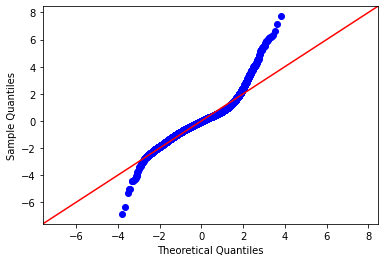

In [418]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

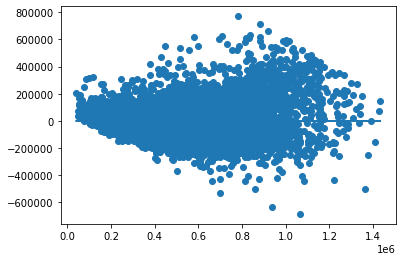

In [419]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Investigate Multicollinearity

In [420]:
# Your code here
X = model_3_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.835614547787525),
 ('bathrooms', 1.9905905381416267),
 ('sqft_living', 4.2415487927215825),
 ('sqft_lot', 2.2824656670414694),
 ('floors', 2.469059845925573),
 ('waterfront_1', 1.0637740740349064),
 ('view_1', 1.3043559685236008),
 ('condition_2', 1.3462346509314147),
 ('condition_3', 27.311648018991402),
 ('condition_4', 12.557070832529247),
 ('condition_5', 4.594065751843023),
 ('grade_11', 1.1184692911307486),
 ('grade_4', 1.1047106481678721),
 ('grade_5', 1.6222752735208255),
 ('grade_6', 5.907130749999885),
 ('grade_7', 18.292201092358376),
 ('grade_8', 10.534124794327505),
 ('grade_9', 4.311227347549521),
 ('zipcode_98004', 1.0901532016459694),
 ('zipcode_98005', 1.071963739423626),
 ('zipcode_98006', 1.1851906215797825),
 ('zipcode_98007', 1.0555865298151246),
 ('zipcode_98008', 1.1133946981114808),
 ('zipcode_98010', 1.0367107946799974),
 ('zipcode_98011', 1.0733093643467861),
 ('zipcode_98014', 1.042160500167356),
 ('zipcode_98019', 1.06859816366288),
 ('zipcod

## Perform Another Round of Feature Selection

In [421]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

80 75


In [422]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     765.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:53   Log-Likelihood:            -1.8938e+05
No. Observations:               14570   AIC:                         3.789e+05
Df Residuals:                   14494   BIC:                         3.795e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.696e+05   2553.077    105.609      0.000    2.65e+05    2.75e+05
bedrooms      -1.009e+04   1185.000     -8.519      0.000   -1.24e+04   -7771.733
bathrooms      1.546e+04   1244.046     12.426      0.000     1.3e+04    1.79e+04
sqft_living    1.047e+05   1669.866     62.704      0.000    1.01e+05    1.08e+05
sqft_lot        2.79e+04   1322.840     21.091      0.000    2.53e+04    3.05e+04
floors         2130.4893   1357.728      1.569      0.117    -530.830    4791.809
waterfront_1   3.557e+05   1.55e+04     22.962      0.000    3.25e+05    3.86e+05
view_1         1.188e+05   3575.655     33.233      0.000    1.12e+05    1.26e+05
condition_2   -1.705e+04   1.03e+04     -1.655      0.098   -3.73e+04    3146.488
condition_5    4.389e+04   3413.212     12.860      0.000    3.72e+04    5.06e+04
grade_11       2.641e+05   1.42e+04     18.556      0.000    2.36e+05    2.92e+05
grade_4        8.294e+04   2.32e+04      3.574      0.000    3.74e+04    1.28e+05
grade_5        2.187e+04   8587.325      2.547      0.011    5040.008    3.87e+04
grade_9        8.137e+04   3126.377     26.027      0.000    7.52e+04    8.75e+04
zipcode_98004  6.533e+05   9070.712     72.023      0.000    6.36e+05    6.71e+05
zipcode_98005  3.705e+05   1.06e+04     34.972      0.000     3.5e+05    3.91e+05
zipcode_98006  3.123e+05   6753.910     46.235      0.000    2.99e+05    3.26e+05
zipcode_98007  2.906e+05   1.09e+04     26.560      0.000    2.69e+05    3.12e+05
zipcode_98008   2.77e+05   7940.318     34.883      0.000    2.61e+05    2.93e+05
zipcode_98010  6.632e+04    1.4e+04      4.744      0.000    3.89e+04    9.37e+04
zipcode_98011  1.557e+05   9511.176     16.368      0.000    1.37e+05    1.74e+05
zipcode_98014  9.636e+04   1.54e+04      6.251      0.000    6.61e+04    1.27e+05
zipcode_98019  8.638e+04   1.02e+04      8.489      0.000    6.64e+04    1.06e+05
zipcode_98024  1.164e+05   1.95e+04      5.983      0.000    7.82e+04    1.54e+05
zipcode_98027  2.256e+05   7612.519     29.631      0.000    2.11e+05     2.4e+05
zipcode_98028  1.396e+05   7761.001     17.986      0.000    1.24e+05    1.55e+05
zipcode_98029  2.505e+05   7710.723     32.486      0.000    2.35e+05    2.66e+05
zipcode_98031  1.761e+04   8196.945      2.148      0.032    1540.941    3.37e+04
zipcode_98033   3.67e+05   6762.086     54.277      0.000    3.54e+05     3.8e+05
zipcode_98034  2.087e+05   6005.858     34.744      0.000    1.97e+05     2.2e+05
zipcode_98038   3.21e+04   6025.811      5.328      0.000    2.03e+04    4.39e+04
zipcode_98039  7.924e+05   2.98e+04     26.568      0.000    7.34e+05    8.51e+05
zipcode_98040  5.278e+05   8896.482     59.325      0.000     5.1e+05    5.45e+05
zipcode_98045  9.212e+04   9623.758      9.572      0.000    7.33e+04    1.11e+05
zipcode_98052  2.779e+05   5903.748     47.068   

In [423]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([107097.33815918, 106382.36366692, 106572.91928415, 109598.95765014,
       113730.00375148, 107280.21305047, 109052.95329719, 105364.09367365,
       108422.34776567, 103240.27095606])

107674.14612549069

2668.4098340600694

In [424]:
# Save model
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('model_3.pkl','wb'))

# Predictions with test data

In [425]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,rank,waterfront_1,view_1,condition_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15367,305000.0,-1.540474,-1.055505,-1.197294,-1.177002,0.986319,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14274,335000.0,-0.366276,-1.055505,-1.243272,0.327909,-0.875711,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10822,400000.0,-0.366276,0.535533,0.414264,-0.869294,0.986319,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16327,585000.0,0.807922,0.535533,0.659619,2.517259,0.986319,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,750000.0,0.807922,-1.055505,0.197134,-0.165314,0.055304,3,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [426]:
len(test)

4857

In [427]:
# Fitting the actual model
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     257.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:57:53   Log-Likelihood:                -63112.
No. Observations:                4857   AIC:                         1.264e+05
Df Residuals:                    4781   BIC:                         1.269e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.738e+05   4396.785     62.279      0.000    2.65e+05    2.82e+05
bedrooms      -1.256e+04   2084.549     -6.025      0.000   -1.66e+04   -8472.658
bathrooms      1.583e+04   2149.842      7.363      0.000    1.16e+04       2e+04
sqft_living    1.045e+05   2898.213     36.052      0.000    9.88e+04     1.1e+05
sqft_lot       2.687e+04   2347.942     11.442      0.000    2.23e+04    3.15e+04
floors         1233.2440   2412.993      0.511      0.609   -3497.333    5963.821
waterfront_1   2.859e+05    3.2e+04      8.924      0.000    2.23e+05    3.49e+05
view_1         1.164e+05   6162.336     18.896      0.000    1.04e+05    1.29e+05
condition_2    -5.53e+04    1.8e+04     -3.080      0.002   -9.05e+04   -2.01e+04
condition_5    4.823e+04   5624.940      8.575      0.000    3.72e+04    5.93e+04
grade_11       2.206e+05   2.68e+04      8.229      0.000    1.68e+05    2.73e+05
grade_4        1.609e+05   4.91e+04      3.277      0.001    6.46e+04    2.57e+05
grade_5        4.345e+04   1.53e+04      2.833      0.005    1.34e+04    7.35e+04
grade_9        8.376e+04   5481.554     15.280      0.000     7.3e+04    9.45e+04
zipcode_98004  6.451e+05   1.42e+04     45.463      0.000    6.17e+05    6.73e+05
zipcode_98005  3.567e+05    1.8e+04     19.781      0.000    3.21e+05    3.92e+05
zipcode_98006  3.314e+05   1.16e+04     28.518      0.000    3.09e+05    3.54e+05
zipcode_98007  2.847e+05   1.94e+04     14.655      0.000    2.47e+05    3.23e+05
zipcode_98008   2.38e+05   1.42e+04     16.758      0.000     2.1e+05    2.66e+05
zipcode_98010  7.932e+04   2.93e+04      2.709      0.007    2.19e+04    1.37e+05
zipcode_98011  1.407e+05   1.59e+04      8.851      0.000     1.1e+05    1.72e+05
zipcode_98014  8.695e+04   2.13e+04      4.088      0.000    4.53e+04    1.29e+05
zipcode_98019  8.468e+04   1.75e+04      4.832      0.000    5.03e+04    1.19e+05
zipcode_98024   1.49e+05   3.61e+04      4.131      0.000    7.83e+04     2.2e+05
zipcode_98027  2.255e+05   1.25e+04     17.984      0.000    2.01e+05     2.5e+05
zipcode_98028  1.436e+05   1.43e+04     10.062      0.000    1.16e+05    1.72e+05
zipcode_98029  2.477e+05   1.35e+04     18.398      0.000    2.21e+05    2.74e+05
zipcode_98031   1.56e+04   1.31e+04      1.195      0.232      -1e+04    4.12e+04
zipcode_98033   3.64e+05    1.2e+04     30.386      0.000     3.4e+05    3.87e+05
zipcode_98034  1.786e+05   1.02e+04     17.493      0.000    1.59e+05    1.99e+05
zipcode_98038  3.301e+04   1.04e+04      3.174      0.002    1.26e+04    5.34e+04
zipcode_98039  9.707e+05   6.24e+04     15.562      0.000    8.48e+05    1.09e+06
zipcode_98040  5.344e+05   1.65e+04     32.461      0.000    5.02e+05    5.67e+05
zipcode_98045  8.169e+04   1.65e+04      4.965      0.000    4.94e+04    1.14e+05
zipcode_98052  2.918e+05   1.01e+04     28.812   

In [428]:
len(x_cols)

75

In [429]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_test = test[x_cols]
y_test = test['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_test, y_test)

scores = cross_val_score(
            linreg, 
            X_test,
            y_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([110405.99779005, 105022.95399904, 109439.25819927, 103436.15125562,
       101686.89042959, 108416.8227195 , 109135.75372501, 124942.91956341,
       100741.03857426, 113406.84312964])

108663.46293853891

6659.264254912819

# THINK: LIMIT ZIP CODES, WHAT ARE MY TOP ONES?

Note: Location within King County is important with a noticeable disparity amongst zipcodes. The median house price ranges from \$235,000 in 98002 up to \$1,260,000 in 98039.

In [430]:
dfziptiers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
0,221900.0,-0.366276,-1.055505,-1.107711,-0.312472,-0.875711,0,0,3,7,-0.698729,1955,98178,-1.008745,-0.324876,0,0
1,538000.0,-0.366276,0.535533,0.914288,0.023000,0.986319,0,0,3,7,0.873264,1951,98125,-0.237968,0.132538,1,1
2,180000.0,-1.540474,-1.055505,-2.216599,0.459077,-0.875711,0,0,3,6,-1.800235,1933,98028,1.342729,0.214273,0,0
3,604000.0,0.807922,2.126570,0.210421,-0.477636,-0.875711,0,0,5,7,-0.999921,1965,98136,-0.959537,-0.510228,0,1
4,510000.0,-0.366276,0.535533,-0.190010,0.170970,-0.875711,0,0,3,8,0.212862,1987,98074,-0.028523,0.105294,0,0


In [431]:
dfziptiers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19427 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19427 non-null  float64
 1   bedrooms       19427 non-null  float64
 2   bathrooms      19427 non-null  float64
 3   sqft_living    19427 non-null  float64
 4   sqft_lot       19427 non-null  float64
 5   floors         19427 non-null  float64
 6   waterfront     19427 non-null  int64  
 7   view           19427 non-null  int64  
 8   condition      19427 non-null  int64  
 9   grade          19427 non-null  int64  
 10  sqft_above     19427 non-null  float64
 11  yr_built       19427 non-null  int64  
 12  zipcode        19427 non-null  int64  
 13  sqft_living15  19427 non-null  float64
 14  sqft_lot15     19427 non-null  float64
 15  renovated      19427 non-null  int64  
 16  basement       19427 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 2.7 MB


In [432]:
categorical_feats = ['basement', 'condition', 'grade', 'renovated', 'view', 'waterfront', 'yr_built']

# Convert to str
for col in categorical_feats:
    dfziptiers[col] = dfziptiers[col].astype('str')

In [433]:
dfziptiers.drop(['zip_tier_1', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode', 'yr_built'],axis = 1, inplace = True)

KeyError: "['zip_tier_1'] not found in axis"

In [ ]:
dfziptiers = pd.get_dummies(dfziptiers, drop_first = True)

In [ ]:
dfziptiers.info()

In [ ]:
zip_feats = ['zip_tier_2', 'zip_tier_3', 'zip_tier_4', 'zip_tier_5', 'zip_tier_6', 
                     'zip_tier_7', 'zip_tier_8', 'zip_tier_9', 'zip_tier_10',]

# Convert to str
for col in zip_feats:
    dfziptiers[col] = dfziptiers[col].astype('uint8')

In [ ]:
dfziptiers.info()

In [ ]:
# Defining the problem
outcome = 'price'
x_cols = list(dfziptiers.columns)
x_cols.remove(outcome)

In [ ]:
dfziptiers.columns

In [ ]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [ ]:
dfziptiers.columns = [col_formatting(col) for col in dfziptiers.columns]

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()